In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
cp  -r "/gdrive/My Drive/Digit Prediction/myData.zip" "/content"

In [3]:
!unzip "/content/myData" -d /content

Streaming output truncated to the last 5000 lines.
 extracting: /content/myData/9/img010-01015.png  
 extracting: /content/myData/9/img010-01016.png  


In [4]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
import pickle

Using TensorFlow backend.


In [0]:
path ="/content/myData"
test_ratio=0.2
val_ratio=0.2
image_size=(128,128,3)

In [6]:
myList = os.listdir(path)
print("Total Number of Classes Detected :",len(myList))

Total Number of Classes Detected : 10


In [0]:
noOfclasses= len(myList)

In [8]:
print("Importing Classes...")

Importing Classes...


In [9]:
images=[]
classNo=[]
for x in range(0,noOfclasses):
  myPicList = os.listdir(path+"/"+str(x))
  for y in myPicList:
    curImg = cv2.imread(path+"/"+str(x)+"/"+y)
    curImg = cv2.resize(curImg,(image_size[0],image_size[1]))
    images.append(curImg)
    classNo.append(x)
  print(x,end=" ")

0 1 2 3 4 5 6 7 8 9 

In [10]:
print(len(images))
print(len(classNo))

10160
10160


In [0]:
images = np.array(images)
classNo = np.array(classNo)

In [12]:
print(images.shape)
print(classNo.shape)

(10160, 128, 128, 3)
(10160,)


#Spliting Data

In [0]:
x_train,x_test,y_train,y_test = train_test_split(images,classNo,test_size=test_ratio)
x_train,x_validation,y_train,y_validation = train_test_split(x_train,y_train,test_size=val_ratio)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(x_validation.shape)

(6502, 128, 128, 3)
(2032, 128, 128, 3)
(1626, 128, 128, 3)


In [0]:
numofSamples=[]
for x in range(0,noOfclasses):
  numofSamples.append(len(np.where(y_train==x)[0]))

In [16]:
print(numofSamples)

[643, 638, 659, 645, 653, 660, 650, 648, 633, 673]


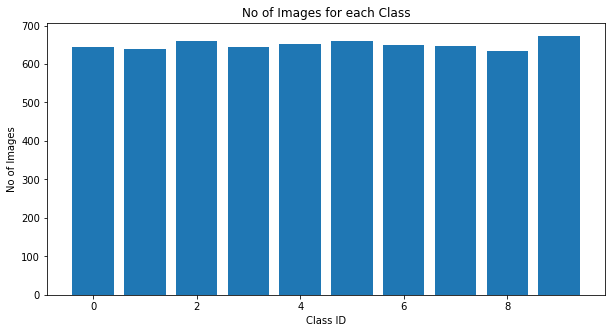

In [17]:
plt.figure(figsize=(10,5))
plt.bar(range(0,noOfclasses),numofSamples)
plt.title('No of Images for each Class')
plt.xlabel("Class ID")
plt.ylabel("No of Images")
plt.show()

In [0]:
def preProcessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/.255
    return img

Before Preprocess


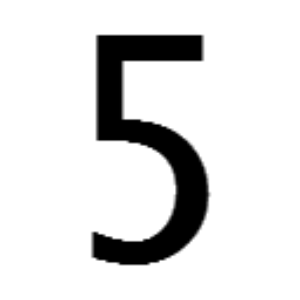

Preprocessed Image


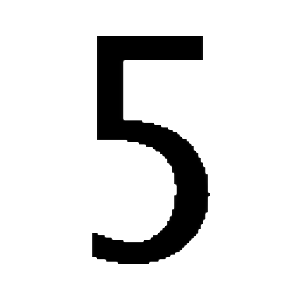

In [19]:
from google.colab.patches import cv2_imshow
img = preProcessing(x_train[0])
img = cv2.resize(img,(300,300))
print("Before Preprocess")
cv2_imshow(cv2.resize(x_train[0],(300,300)))
print("Preprocessed Image")
cv2_imshow(img)
#cv2.waitKey(0)

In [20]:
print(x_train[0].shape)
x_train = np.array(list(map(preProcessing,x_train)))
print(x_train[0].shape)

(128, 128, 3)
(128, 128)


In [21]:
print(x_test[0].shape)
x_test = np.array(list(map(preProcessing,x_test)))
print(x_test[0].shape)

(128, 128, 3)
(128, 128)


In [22]:
print(x_validation[0].shape)
x_validation = np.array(list(map(preProcessing,x_validation)))
print(x_validation[0].shape)

(128, 128, 3)
(128, 128)


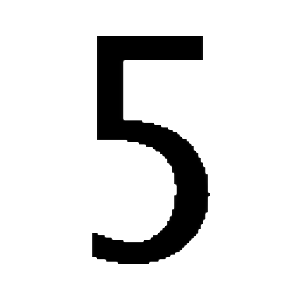

Preprocessed Image


In [23]:
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.resize(x_train[0],(300,300)))
print("Preprocessed Image")

#cv2.waitKey(0)

In [24]:
print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
print(x_train.shape)

(6502, 128, 128)
(6502, 128, 128, 1)


In [0]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
x_validation = x_validation.reshape(x_validation.shape[0],x_validation.shape[1],x_validation.shape[2],1)

In [0]:
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

In [0]:
dataGen.fit(x_train)


In [0]:
y_train = to_categorical(y_train,noOfclasses)
y_test = to_categorical(y_test,noOfclasses)
y_validation = to_categorical(y_validation,noOfclasses)

In [0]:
def model():
  filters=60
  sizeoffilter1 = (5,5)
  sizeoffilter2 = (3,3)
  sizeofpool = (2,2)
  node=500

  model = Sequential();
  model.add((Conv2D(filters,sizeoffilter1,input_shape=(image_size[0],image_size[1],1)
  ,activation="relu")))

  model.add((Conv2D(filters,sizeoffilter1,activation="relu")))
  model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add((Conv2D(filters//2,sizeoffilter2,activation="relu")))
  model.add((Conv2D(filters//2,sizeoffilter2,activation="relu")))
  model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(node,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(noOfclasses,activation="softmax"))

  model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=['accuracy'])

  return model

In [0]:
model=model()

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 60)      1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 120, 60)      90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 30)        8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 30)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 30)       

In [0]:
os.environ["CUDA_VISIBLE_DEVICES"]="3"

In [0]:
batchsize=256
epochs=30
stepsperepoch= 2000
history = model.fit_generator(dataGen.flow(x_train,y_train,batch_size=batchsize),
                    steps_per_epoch=stepsperepoch,
                    epochs=epochs,
                    validation_data = (x_validation,y_validation),
                    shuffle=1)

In [0]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()


In [0]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy = ',score[1])

In [0]:
model.save('/gdrive/My Drive/Digit Prediction/model_trained30.model')

In [0]:
cp  -r "/gdrive/My Drive/Digit Prediction/model_trained30.model" "/content"

In [0]:
out=open("/content/model_trained30.p","wb")
pickle.dump(model,out)
out.close()

In [0]:


'''
## Camera Capture
Using a webcam to capture images for processing on the runtime.
Source: https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=2viqYx97hPMi
'''

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=1):
  js = Javascript('''
    async function takePhoto(quality) {


      const div = document.createElement('div');
      
      // show the video in the HTML element
      document.body.appendChild(div);
      
      const canvas = document.createElement('canvas');
      div.appendChild(canvas);
      const ctx = canvas.getContext('2d');
      
      canvas.style="border:5px solid black;"
      canvas.height = 280;
      canvas.width  = 280;
      ctx.fillStyle = 'green';
      ctx.fillRect(0, 0, canvas.width, canvas.height);

      let painting =false;
      function startPosition(e){
          painting=true;
          draw(e);
      }
      function finishedPosition(){
          painting = false;
          ctx.beginPath();
      }
      function draw(e){
          if(!painting) return;
          ctx.lineWidth=10;
          ctx.lineCap - "round";
          ctx.lineTo(e.clientX,e.clientY);
          ctx.stroke();
          /*ctx.beginPath();
          ctx.moveTo(e.clientX,e.clientY);*/
      }
      canvas.addEventListener("mousedown",startPosition);
      canvas.addEventListener("mouseup",finishedPosition);
      canvas.addEventListener("mousemove",draw);
      function predict(){
        print("called")
        img = canvas.toDataURL();
        google.colab.kernel.invokeFunction('notebook.run_algo', [img], {});
      }
      const submit =  document.createElement('Button');
      submit.innerText="Submit";
      submit.onClick="predict()";
      submit.addEventListener("click",predict);
      div.appendChild(submit);
    }
    ''')
  display(js) # make the provided HTML, part of the cell
  data = eval_js('takePhoto({})'.format(quality)) # call the takePhoto() JavaScript function

In [37]:
import IPython
from google.colab import output
from google.colab.patches import cv2_imshow
import io
import time
import sys
import numpy as np
import cv2
import keras
from PIL import Image
from io import BytesIO
import base64
import logging
from skimage.io import imread
from skimage.transform import resize

def data_uri_to_img(uri):
  """convert base64image to numpy array"""
  try:
    image = base64.b64decode(uri.split(',')[1], validate=True)
    # make the binary image, a PIL image
    image = Image.open(BytesIO(image))
    # convert to numpy array
    image = np.array(image); 
    return image

    decoded = base64.b64decode(uri.split(',')[1], validate=True)
    bytesio=io.BytesIO(decoded)
    filename="/content/test.png"
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())
  except Exception as e:
    logging.exception(e);print('\n')
    return None

def preProcessing(img):
    img = np.array(img, dtype=np.uint8)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/.255
    return img
model = keras.models.load_model("/content/model_trained30.model")
print(" * Model Loded!")

def run_algo(imgB64):
  """
  in Colab, run_algo function gets invoked by the JavaScript, that sends N images every second

  params:
    image: image
  """
  image = data_uri_to_img(imgB64)  
  if image is None:
    print("At run_algo(): image is None.")
    return

  try:
    img = np.asarray(image)
    img.astype(np.float32)
    img = cv2.resize(img,(128,128))
    #cv2_imshow(img)
    img = preProcessing(img)
    cv2_imshow(img)
    #print(img.shape)
    img = img.reshape(1,128,128,1)
    classIndex = int(model.predict_classes(img))
    #print(classIndex)
    predictions = model.predict(img)
    #print(predictions)
    probVal= np.amax(predictions)
    print(classIndex,probVal)
  except Exception as e:
    logging.exception(e)
    print('.........\n')

# register this function, so JS code could call this
output.register_callback('notebook.run_algo', run_algo)

# put the JS code in cell and run it
#take_photo()

 * Model Loded!


<IPython.core.display.Javascript object>

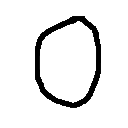

0 0.9999999


In [40]:
take_photo()

<IPython.core.display.Javascript object>

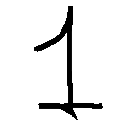

1 1.0


In [41]:
take_photo()

<IPython.core.display.Javascript object>

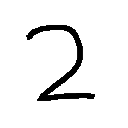

2 0.9999008


In [42]:
take_photo()

<IPython.core.display.Javascript object>

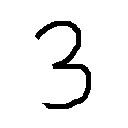

3 0.9999553


In [43]:
take_photo()

<IPython.core.display.Javascript object>

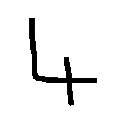

4 0.97120947


In [44]:
take_photo()

<IPython.core.display.Javascript object>

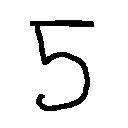

5 0.9999989


In [45]:
take_photo()

<IPython.core.display.Javascript object>

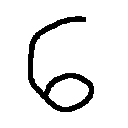

6 0.99988914


In [46]:
take_photo()

<IPython.core.display.Javascript object>

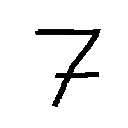

7 0.95487106


In [47]:
take_photo()

<IPython.core.display.Javascript object>

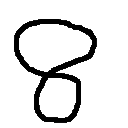

8 0.99993384


In [48]:
take_photo()

<IPython.core.display.Javascript object>

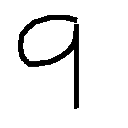

9 0.99999905


In [49]:
take_photo()